# Counting Cells in Microscopic Images

**by [Tony Kabilan Okeke](mailto:tko35@drexel.edu)**

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Install necessary packages
import sys,os; sys.path.append(os.environ['BMESAHMETDIR']); import bmes
bmes.pipinstall('skimage','scikit-image')

# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import io, filters, morphology, measure

# Import my functions
from hwbmeimg_countcells import myimshow, hwbmeimg_countcells

In [ ]:
cell_color = np.array([250, 250, 220])
threshold = 20

J = img.copy()

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        if (abs(J[i,j,:] - cell_color)).mean() < threshold:
            J[i,j,:] = 255
imshow(J, 'Color-Thresholded image');

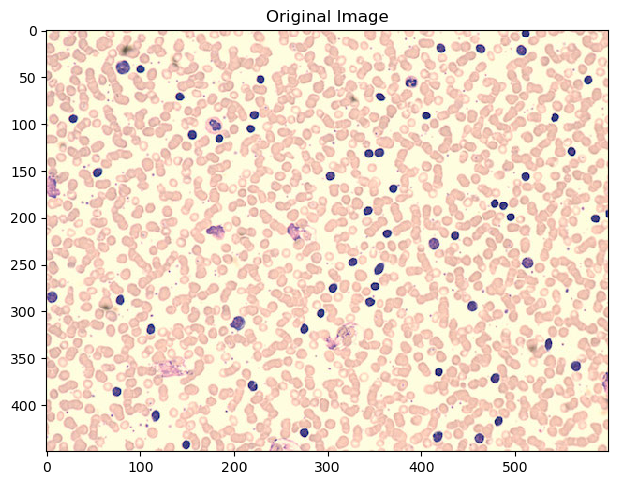

In [2]:
# Download a test image
URL = ('http://sacan.biomed.drexel.edu/lib/exe/fetch.php'
       '?media=course:bcomp2:img:samplecells.jpg')
imfile = bmes.downloadurl(URL, './samplecells.jpg');

# Read the image data from the file.
I = io.imread(imfile);
myimshow(I, 'Original Image', dbg=True);

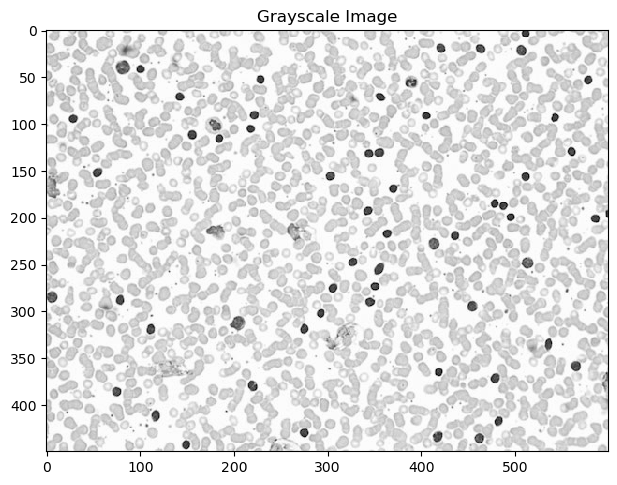

In [3]:
# Make image grayscale
I = skimage.color.rgb2gray(I)
myimshow(I, 'Grayscale Image', dbg=True);

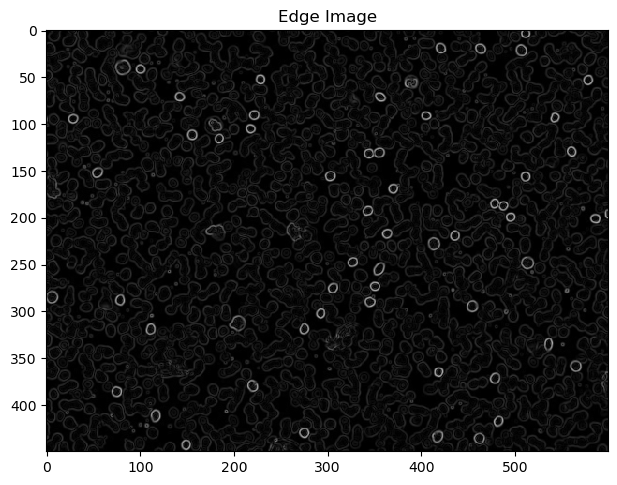

In [16]:
# Apply sobel edge detection
Iedge = filters.sobel(I)
myimshow(Iedge, 'Edge Image', dbg=True);

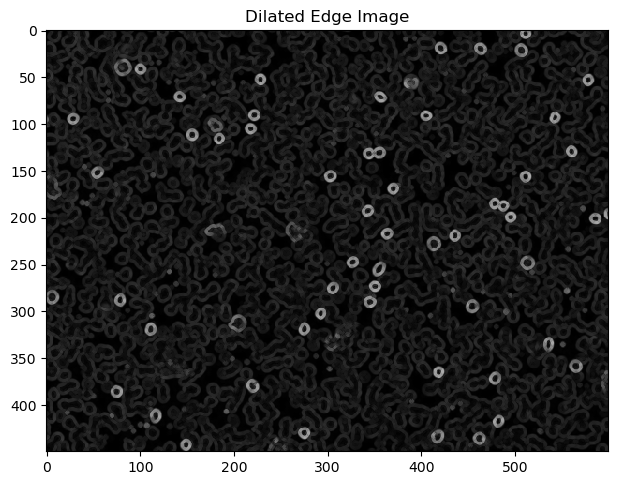

In [17]:
# Dilate the edge image
Idilate = morphology.dilation(Iedge, morphology.disk(1, dtype=bool))
myimshow(Idilate, 'Dilated Edge Image', dbg=True);

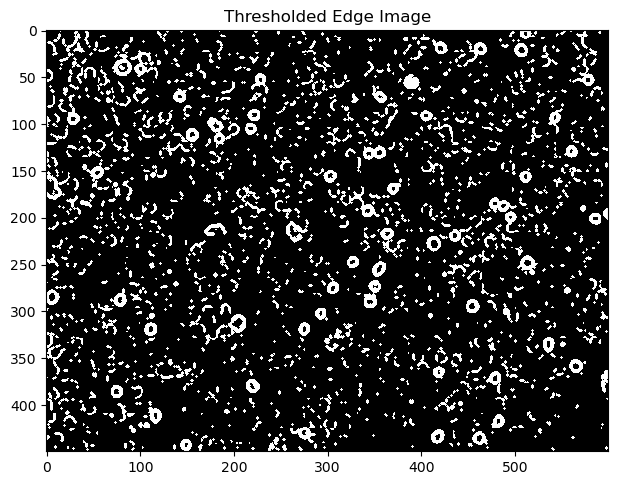

In [20]:
# Threshold the dilated edge image
Ithresh = Idilate > 0.15
myimshow(Ithresh, 'Thresholded Edge Image', dbg=True);

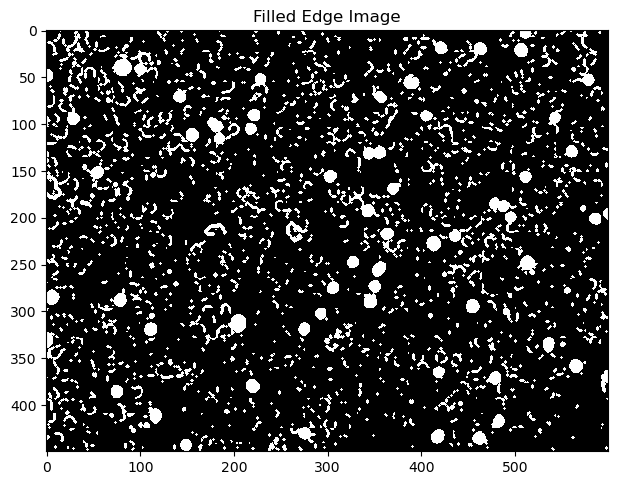

In [31]:
# Fill the interior gaps of the edge image
Ifill = morphology.remove_small_holes(Ithresh, 100, connectivity=10)
myimshow(Ifill, 'Filled Edge Image', dbg=True);

In [ ]:
# Deal with edge cells
# Use a binary image
# Wrap the image with a border row/column that is the inverse of the last
# row/column

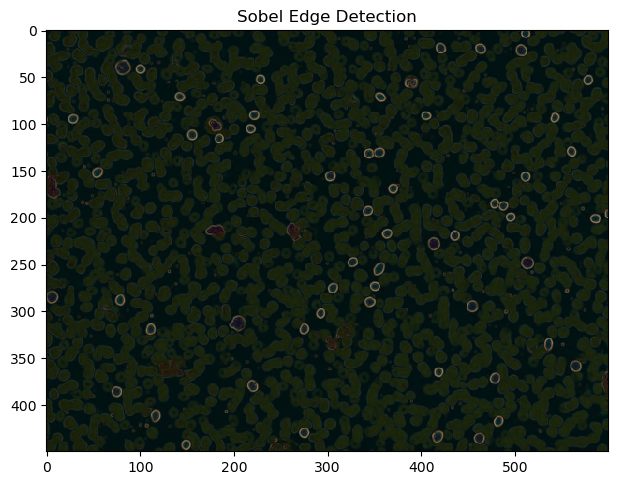

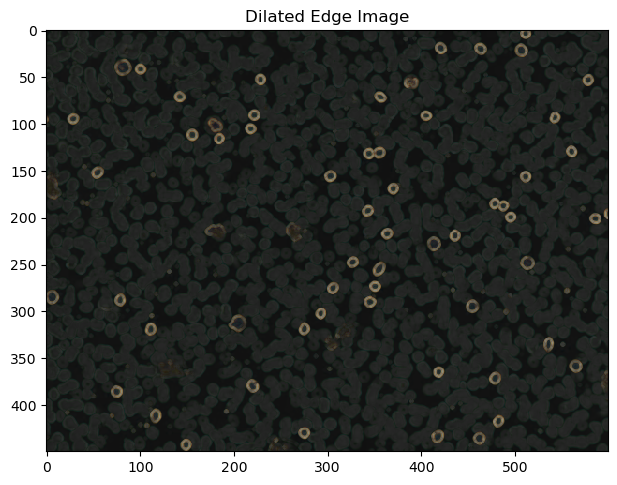

ValueError: Intensity of seed image must be greater than that of the mask image for reconstruction by erosion.

In [31]:
# Apply sobel edge detection
edge_sobel = filters.sobel(img)
myimshow(edge_sobel, 'Sobel Edge Detection', dbg=True)

# Dilate the edge image
edge_dilate = morphology.dilation(edge_sobel)
myimshow(edge_dilate, 'Dilated Edge Image', dbg=True)

# Fill the interior gaps of the edge image
seed = np.copy(img)
seed[1:-1, 1:-1] = img.max()
edge_fill = morphology.reconstruction(edge_dilate, seed, method='erosion')
myimshow(edge_fill, 'Filled Edge Image', dbg=True)

# Smoothen the objects in the edge image

# Show the edge image overlayed on the original image

# Find the connected components in the edge image

# Count the number of cells in the image

In [ ]:
# % Find and download your own example image.
# % If image is available as a URL, use bmes.downloadurl() to download it.
# % If image is not available as a URL, manually place a copy of the image in
# % the same folder as this script, and hard-code the file name.

# % Uncomment the following line if you have a url.
# % file=bmes.downloadurl('ENTER YOUR OWN URL','samplecells2.jpg');
# % Uncomment the following line if you have a local file in instead.
# % file='./samplecells2.jpg';

# hwbmeimg_countcells(file, true)

* Choose a parameter used in one of the image processing steps used in bmeimg_countcells(). Extend the function bmeimg_countcells() to take an additional input argument for this parameter. In the function use a default value when the parameter is not given as input.

* Analyze the dependency of the cell count found on this parameter, by calling bmeimg_countcells() for a range of values for this parameter. Create a plot for the parameter value vs. number of cells found.
